##EDA1



In [163]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [164]:
#1.What is the range of selling prices in the dataset?
a=df["selling_price"].min()
b=df['selling_price'].max()
range = b-a
print(f"The range of selling prices in the dataset is {range}")


The range of selling prices in the dataset is 755000


In [165]:
#2.What is the median selling price for bikes in the dataset?
median=df['selling_price'].median()
print(f"The median selling price for bikes in the dataset is {median}")

The median selling price for bikes in the dataset is 45000.0


In [166]:
#3. What is the most common seller type?
common_seller = df['seller_type'].mode()[0]
print(f"The most common seller type is {common_seller}")

The most common seller type is Individual


In [167]:
#4. How many bikes have driven more than 50,000 kilometersD
bikes_above_50k = (df['km_driven'] > 50000).sum()
print(f"There are {bikes_above_50k} bikes driven more than 50,000 km.")


There are 170 bikes driven more than 50,000 km.


In [168]:
#5.What is the average km_driven value for each ownership type?

avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [169]:
#6.What proportion of bikes are from the year 2015 or older?
bikes_2015_older = (df['year'] >= 2015).sum()
total_bikes = len(df)
proportion = bikes_2015_older / total_bikes
print(f"The proportion of bikes from the year 2015 or older is {proportion:.2%}")

The proportion of bikes from the year 2015 or older is 52.78%


In [170]:
#7.What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [171]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_price = df['ex_showroom_price'].max()
bike_with_highest_ex_price = df[df['ex_showroom_price'] == highest_ex_price]['name'].values[0]
print(f"The highest ex_showroom_price recorded is {highest_ex_price} and it was for the bike {bike_with_highest_ex_price}.")

The highest ex_showroom_price recorded is 1278000.0 and it was for the bike Harley-Davidson Street Bob.


In [172]:
#9.What is the total number of bikes listed by each seller type?
bike_count_by_seller = df.groupby('seller_type')['name'].count()
print(bike_count_by_seller)

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


In [173]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_data = df[df['owner'] == 'First Owner']
correlation = first_owner_data['selling_price'].corr(first_owner_data['km_driven'])
print(f"The correlation between selling_price and km_driven for first-owner bikes is {correlation:.2f}")


The correlation between selling_price and km_driven for first-owner bikes is nan


In [174]:
#11. and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_bike_df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
outliers_removed = len(df) - len(filtered_bike_df)

outliers_removed, filtered_bike_df.shape[0]



(39, 1022)

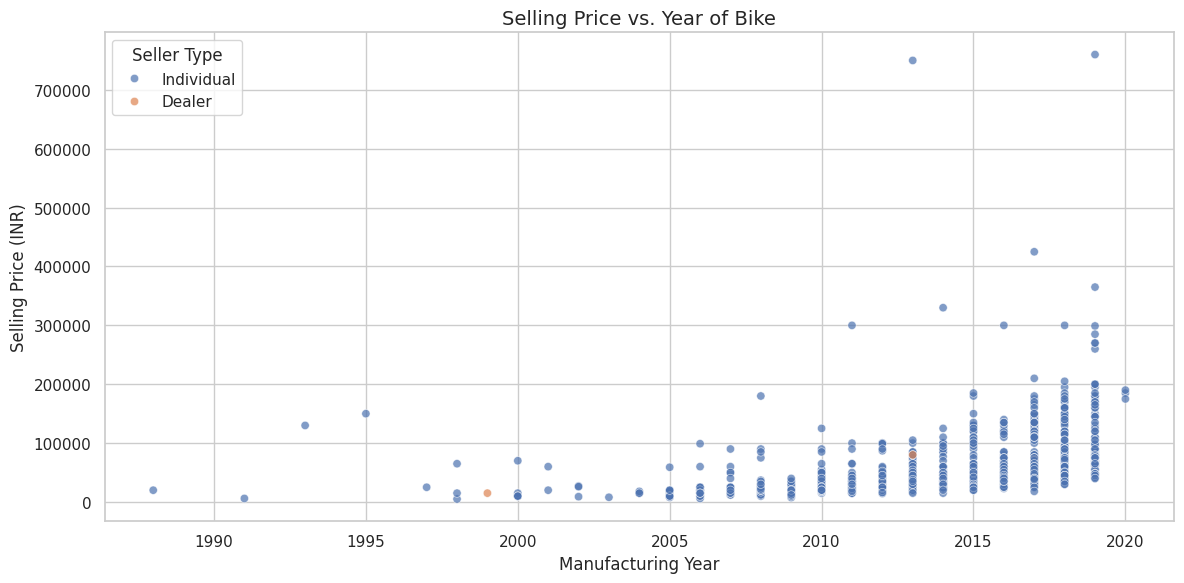

In [175]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price?
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_bike_df, x='year', y='selling_price', hue='seller_type', alpha=0.7)
plt.title("Selling Price vs. Year of Bike", fontsize=14)
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.legend(title="Seller Type")
plt.tight_layout()
plt.show()

Average selling price based on bike age:
bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


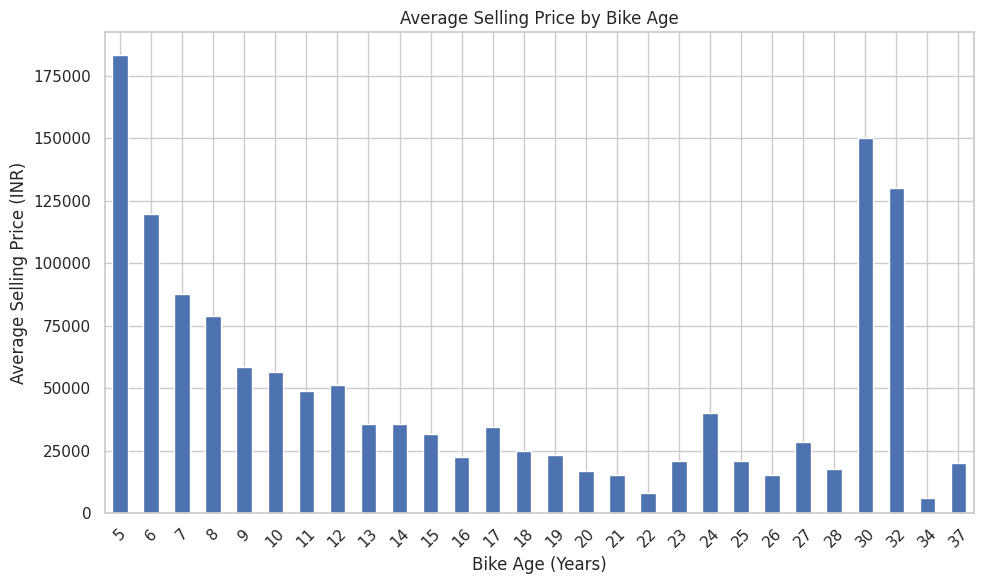

In [176]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
import matplotlib.pyplot as plt
from datetime import datetime

current_year = datetime.now().year
df['bike_age'] = current_year - df['year']
average_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

print("Average selling price based on bike age:")
print(average_depreciation_by_age)

plt.figure(figsize=(10, 6))
average_depreciation_by_age.plot(kind='bar')
plt.title('Average Selling Price by Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['average_price_year'] = df['year'].map(average_price_by_year)
significant_priced_bikes = df[df['selling_price'] > df['average_price_year']]
significant_priced_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age,average_price_year
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,119689.511628
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,56500.000000
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,34289.285714
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,6,119689.511628
...,...,...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,9,58469.018692
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,11,48668.131868
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,13,35748.400000
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,11,48668.131868


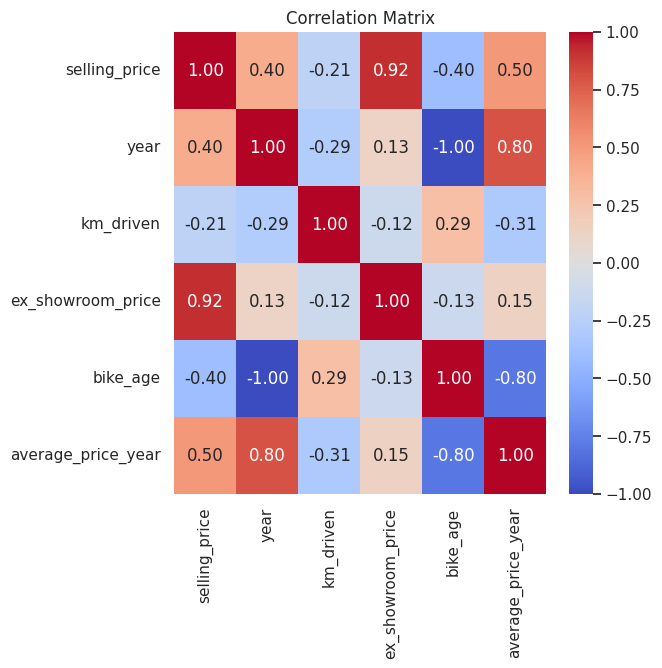

In [178]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap?
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#EDA2

In [179]:
df=pd.read_csv('Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [180]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers.
import pandas as pd
import numpy as npe
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values()
print("Average Selling Price by Dealer:")
print(avg_price_by_dealer)
print("\nComparison Across Dealers:")
print(f"Lowest Average Price: {avg_price_by_dealer.min():.2f} (Dealer: {avg_price_by_dealer.idxmin()})")
print(f"Highest Average Price: {avg_price_by_dealer.max():.2f} (Dealer: {avg_price_by_dealer.idxmax()})")
print(f"Range of Average Prices: {avg_price_by_dealer.max() - avg_price_by_dealer.min():.2f}")

Average Selling Price by Dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
Pitre Buick-Pontiac-Gmc of Scottsdale              27404.248408
Chrysler Plymouth                                  27555.526400
McKinney Dodge Chrysler Jeep                       27684.096979
Clay Johnson Auto Sales                            27816.027113
Nebo Chevrolet                                     27818.889415
Hatfield Volkswagen                                27853.712242
New Castle Ford Lincoln Mercury                    27867.131955
Progressive Shippers Cooperative Association No    27884.264036
Ryder Truck Rental and Leasing                     27914.988782
Motor Vehicle Branch Office                        27956.739617
Diehl Motor CO Inc                                 27993.929487
Pars Auto Sales                                    28013.060317
Tri-State Mack Inc                                 28095.562050
C & M Motors Inc                                   28111.75

In [181]:
#2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation (Standard Deviation) by Company:")
print(price_variation_by_company)
highest_variation_company = price_variation_by_company.idxmax()
highest_variation_value = price_variation_by_company.max()
print(f"\nCompany with Highest Price Variation: {highest_variation_company}")
print(f"Standard Deviation: {highest_variation_value:.2f}")
print("\nInterpretation: A high standard deviation indicates inconsistent pricing, possibly due to diverse models, luxury vs. economy segments, or regional/market demand differences.")

Price Variation (Standard Deviation) by Company:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

Company with Highest Price Variation: Lincoln
Standard Deviation: 19658.05

Interpretation: A high s

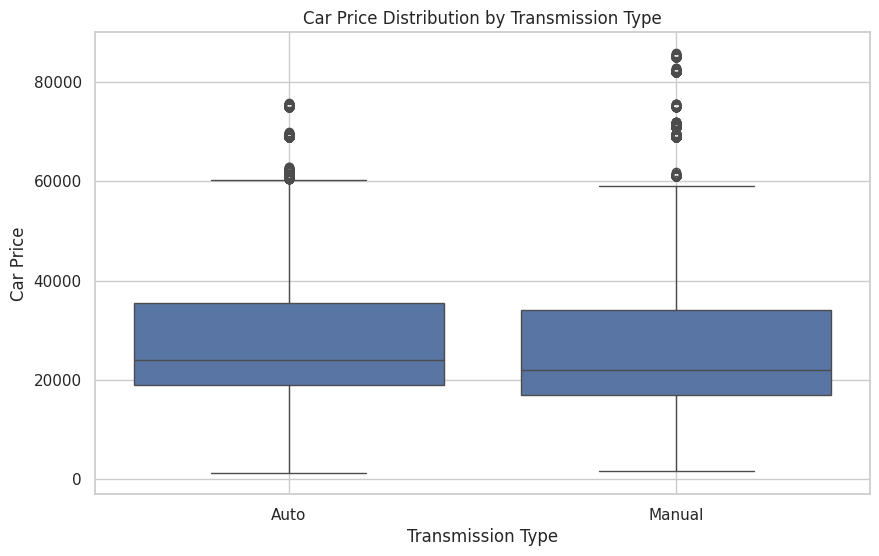

                  25%      50%      75%      IQR
Transmission                                    
Auto          19000.0  24000.0  35500.0  16500.0
Manual        17000.0  22001.0  34000.0  17000.0


In [182]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?\
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title("Car Price Distribution by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Car Price")
plt.grid(True)
plt.show()
iqr_summary = df.groupby('Transmission')['Price ($)'].describe()[['25%', '50%', '75%']]
iqr_summary['IQR'] = iqr_summary['75%'] - iqr_summary['25%']
print(iqr_summary)

In [183]:
#4. What is the distribution of car prices across different regions?

price_dist_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()

print("Price Distribution by Region:")
print(price_dist_by_region)


Price Distribution by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000

In [184]:
#5.What is the distribution of cars based on body styles?
body_style_dist = df['Body Style'].value_counts()
body_style_pct = df['Body Style'].value_counts(normalize=True) * 100
body_style_summary = pd.DataFrame({'Count': body_style_dist, 'Percentage (%)': body_style_pct})
print("Distribution of Cars by Body Style:")
print(body_style_summary)


Distribution of Cars by Body Style:
            Count  Percentage (%)
Body Style                       
SUV          6374       26.662762
Hatchback    6128       25.633732
Sedan        4488       18.773530
Passenger    3945       16.502133
Hardtop      2971       12.427842


In [185]:
#6.How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender = df.groupby('Gender')['Price ($)'].mean()
print("Average Selling Price by Gender:")
print(avg_price_by_gender)

income_bins = [0, 50000, 100000, 500000, 1000000, 5000000, float('inf')]
income_labels = ['0-50K', '50K-100K', '100K-500K', '500K-1M', '1M-5M', '5M+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

avg_price_by_gender_income = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()
print("\nAverage Selling Price by Gender and Income Bracket:")
avg_price_by_gender_income

Average Selling Price by Gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64

Average Selling Price by Gender and Income Bracket:


Income Bracket,0-50K,50K-100K,100K-500K,500K-1M,1M-5M,5M+
Gender,,,,,,
Female,28132.038732,NaN,28502.055062,28071.197807,28646.115975,27222.444444
Male,27816.302247,43000.0,28506.557505,27960.837309,28140.849393,30693.448276


In [186]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

price_dist_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()
print("Price Distribution by Region:")
print(price_dist_by_region)

cars_sold_by_region = df['Dealer_Region'].value_counts()
cars_sold_pct = df['Dealer_Region'].value_counts(normalize=True) * 100
cars_sold_summary = pd.DataFrame({'Count': cars_sold_by_region, 'Percentage (%)': cars_sold_pct})


print("\nNumber of Cars Sold by Region:")
cars_sold_summary

Price Distribution by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000

,Count,Percentage (%)
Dealer_Region,,
Austin,4135,17.296913
Janesville,3821,15.983435
Scottsdale,3433,14.360412
Pasco,3131,13.097130
Aurora,3130,13.092947
Greenville,3128,13.084581
Middletown,3128,13.084581


In [187]:
#8.How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values()

print("Average Selling Price by Engine Type:")
print(avg_price_by_engine)

print("\nComparison:")
print(f"Lowest Average Price: {avg_price_by_engine.min():.2f} (Engine: {avg_price_by_engine.idxmin()})")
print(f"Highest Average Price: {avg_price_by_engine.max():.2f} (Engine: {avg_price_by_engine.idxmax()})")



Average Selling Price by Engine Type:
Engine
Overhead Camshaft            27914.710631
DoubleÂ Overhead Camshaft    28248.525972
Name: Price ($), dtype: float64

Comparison:
Lowest Average Price: 27914.71 (Engine: Overhead Camshaft)
Highest Average Price: 28248.53 (Engine: DoubleÂ Overhead Camshaft)


Average Car Price by Annual Income Bracket:
Income Bracket
0-50K        27884.297820
500K-1M      27987.008477
1M-5M        28226.922544
100K-500K    28505.351570
5M+          29871.368421
50K-100K     43000.000000
Name: Price ($), dtype: float64


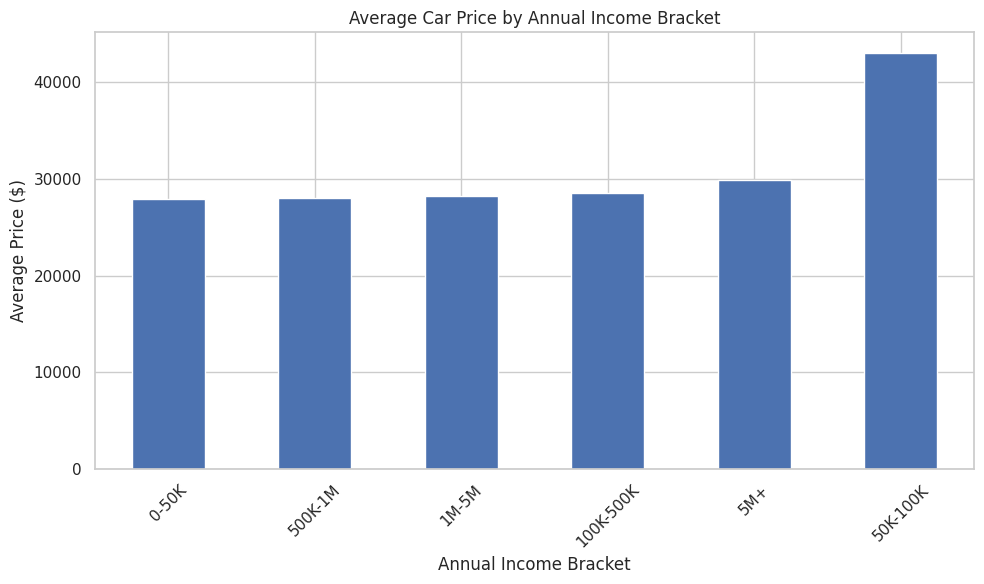

In [188]:
#9. How do car prices vary based on the customer’s annual income bracket?
import pandas as pd
import matplotlib.pyplot as plt
income_bins = [0, 50000, 100000, 500000, 1000000, 5000000, float('inf')]
income_labels = ['0-50K', '50K-100K', '100K-500K', '500K-1M', '1M-5M', '5M+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean().sort_values()

print("Average Car Price by Annual Income Bracket:")
print(avg_price_by_income)

plt.figure(figsize=(10, 6))
avg_price_by_income.plot(kind='bar')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 Car Models by Sales Count:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


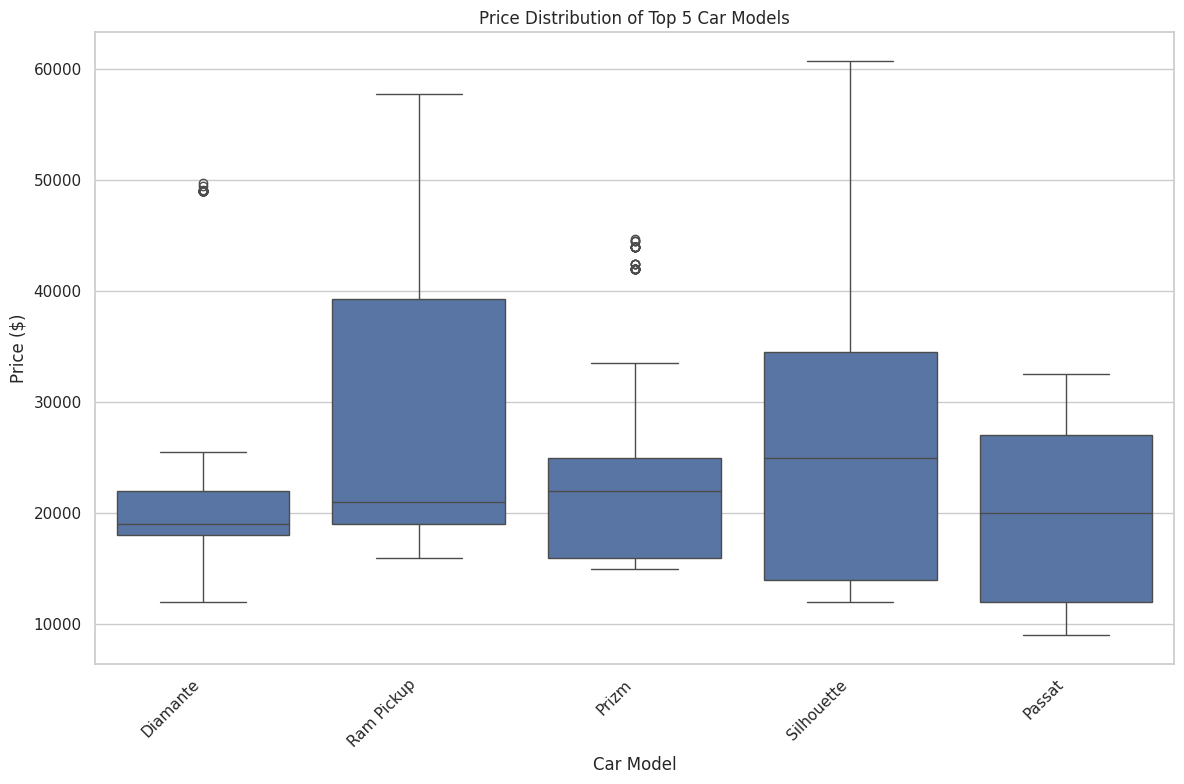

In [189]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution lookE
model_sales_count = df['Model'].value_counts()
top_5_models = model_sales_count.head(5).index
print("Top 5 Car Models by Sales Count:")
print(model_sales_count.head(5))
top_models_df = df[df['Model'].isin(top_5_models)].copy()
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_models_df, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Car Price by Color and Engine Size:
Engine      DoubleÂ Overhead Camshaft  Overhead Camshaft
Color                                                   
Black                    25766.451103       31732.967164
Pale White               30347.987460       24327.767694
Red                      27434.392314       30153.405229

Price Variation (Standard Deviation) by Color:

Color with the Highest Price Variation: Red (Standard Deviation: 15519.36)


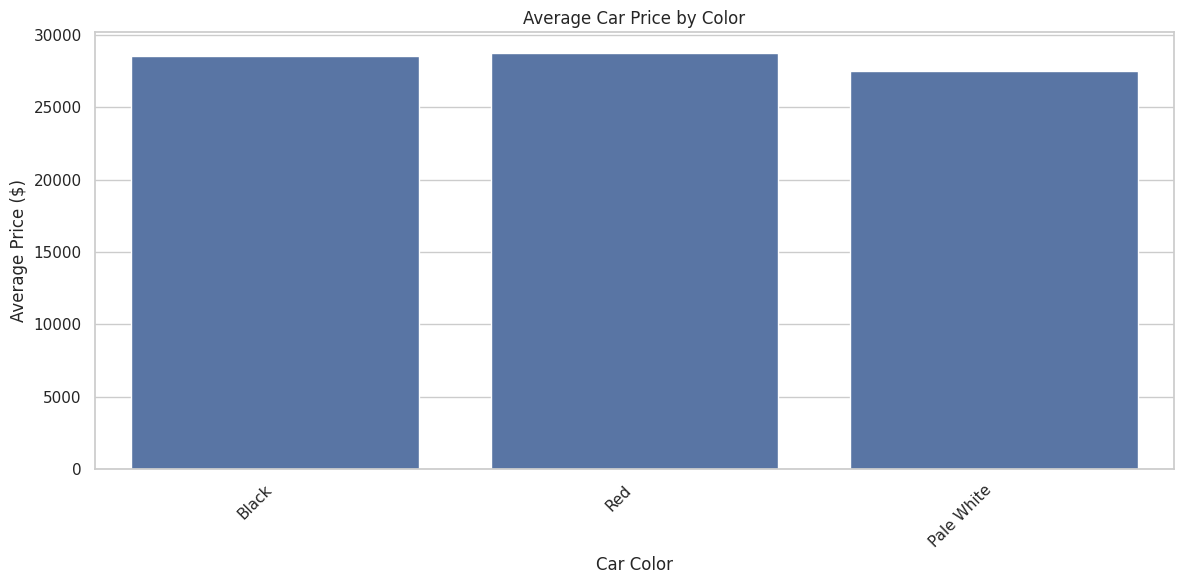

In [190]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest pricevariation?
price_variation_color_engine = df.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()
print("Average Car Price by Color and Engine Size:")
print(price_variation_color_engine)


price_std_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("\nPrice Variation (Standard Deviation) by Color:")
price_std_by_color

highest_variation_color = price_std_by_color.idxmax()
highest_variation_value = price_std_by_color.max()
print(f"\nColor with the Highest Price Variation: {highest_variation_color} (Standard Deviation: {highest_variation_value:.2f})")

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Color', y='Price ($)', ci=None)
plt.title('Average Car Price by Color')
plt.xlabel('Car Color')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

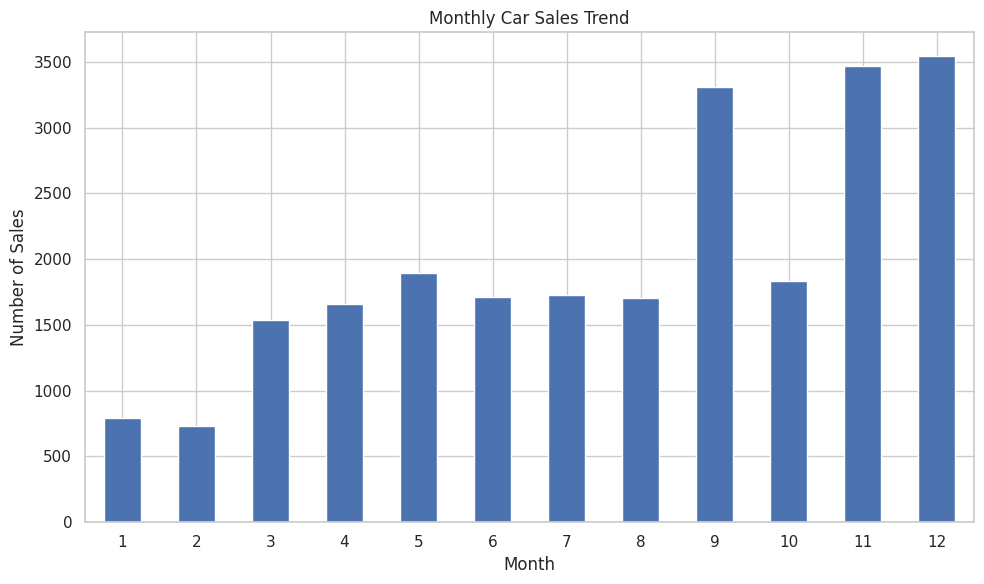

In [191]:
#12.Is there any seasonal trend in car sales based on the date of sale?
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    monthly_sales = df['Month'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='bar')
    plt.title('Monthly Car Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Number of Sales')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No 'Date' column found in the DataFrame to analyze seasonal trends.")

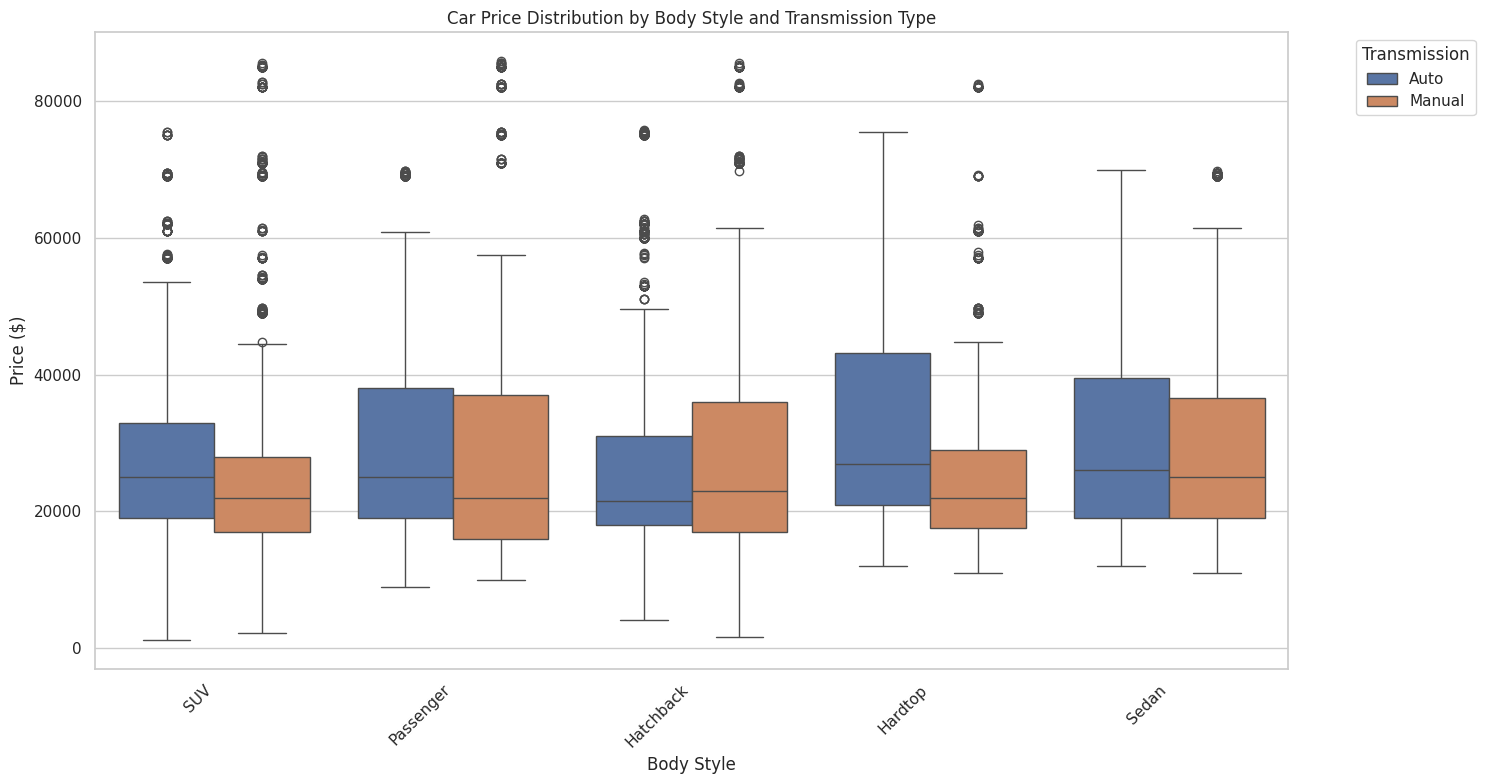

In [192]:
#13.How does the car price distribution change when considering different combinations of body style andtransmission type?
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [193]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df['Engine_Numeric'] = df['Engine'].map({'Overhead Camshaft': 1, 'Double Overhead Camshaft': 2})
numeric_cols = df[['Price ($)', 'Annual Income', 'Engine_Numeric']]
correlation_matrix = numeric_cols.corr()

print("Correlation Matrix (Price, Annual Income, Engine):")
print(correlation_matrix)

print("\nInterpretation:")
print("Correlation values range from -1 to 1. Positive values indicate a direct relationship, negative values an inverse one. Strong correlations (e.g., >0.5 or <-0.5) suggest interaction between features, e.g., higher income might correlate with higher prices.")

Correlation Matrix (Price, Annual Income, Engine):
                Price ($)  Annual Income  Engine_Numeric
Price ($)        1.000000       0.012065             NaN
Annual Income    0.012065       1.000000             NaN
Engine_Numeric        NaN            NaN             NaN

Interpretation:
Correlation values range from -1 to 1. Positive values indicate a direct relationship, negative values an inverse one. Strong correlations (e.g., >0.5 or <-0.5) suggest interaction between features, e.g., higher income might correlate with higher prices.


In [194]:
#15.How does the average car price vary across different car models and engine types?
average_price_pivot = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

print("Average Car Price (Pivot Table - Model vs. Engine Type):")
average_price_pivot


Average Car Price (Pivot Table - Model vs. Engine Type):


Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
...,...,...
Viper,32118.479167,26052.375000
Voyager,22066.026316,33995.678322
Windstar,25145.636364,17100.272727


#EDA3

In [195]:
df=pd.read_csv('amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [196]:
#1.What is the average rating for each product category?
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_rating_by_category = df.dropna(subset=['rating']).groupby('category')['rating'].mean()

average_rating_by_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [197]:
#2.What are the top rating_count products by category?
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df_cleaned = df.dropna(subset=['rating_count'])
top_n = 5

top_products_by_category = df_cleaned.groupby('category').apply(lambda x: x.nlargest(top_n, 'rating_count')).reset_index(drop=True)
print("Top Products by Rating Count within Each Category:")
top_products_by_category

Top Products by Rating Count within Each Category:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B09F3PDDRF,Lapster USB 3.0 sata Cable for 2.5 inch SSD an...,Computers&Accessories|Accessories&Peripherals|...,₹349,₹999,65%,3.9,817.0,Sata cable is Powered by ASM Chipset bridge wh...,"AG726NQTX4GKLFNXFOAQBFA6JQGQ,AHAI3QJ4Q5GQAQRQT...","Vignesh Prabu VP,Sachine,Shobhit Chaurasiya,Ku...","R1CJ0MB11B1FIY,RIDJYDQN13E73,R34VA5BFT3PL9D,R1...","Compatible with laptop SSD,Good to connect say...","It works great for my laptop,This is a good ac...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LAPSTER-SATA-CABLE-LAPTO...
1,B08QSC1XY8,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,Computers&Accessories|Accessories&Peripherals|...,₹389,"₹1,099",65%,4.3,974.0,{3A/QC 3.0 FAST CHARGING and DATA SYNC} : This...,"AHMKXORT3VNMB75C3EUBYMFYELFQ,AEKJRELVNMICYPOYT...","Pratyush Pahuja,Thiyagarajan,yeses,Amazon Cust...","R2S0AYWUV349HP,R35OW9CYQNAYHY,R3B3DDF1D5NULK,R...","Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...,https://m.media-amazon.com/images/I/419QKVTxaS...,https://www.amazon.in/Charging-Braided-Charger...
2,B08QSDKFGQ,Zoul USB Type C Fast Charging 3A Nylon Braided...,Computers&Accessories|Accessories&Peripherals|...,₹339,"₹1,099",69%,4.3,974.0,{3A/QC 3.0 FAST CHARGING and DATA SYNC} : This...,"AHMKXORT3VNMB75C3EUBYMFYELFQ,AEKJRELVNMICYPOYT...","Pratyush Pahuja,Thiyagarajan,yeses,Amazon Cust...","R2S0AYWUV349HP,R35OW9CYQNAYHY,R3B3DDF1D5NULK,R...","Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Charging-Braided-Charger...
3,B08QSC1XY8,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,Computers&Accessories|Accessories&Peripherals|...,₹389,"₹1,099",65%,4.3,974.0,{3A/QC 3.0 FAST CHARGING and DATA SYNC} : This...,"AHMKXORT3VNMB75C3EUBYMFYELFQ,AEKJRELVNMICYPOYT...","Pratyush Pahuja,Thiyagarajan,yeses,Amazon Cust...","R2S0AYWUV349HP,R35OW9CYQNAYHY,R3B3DDF1D5NULK,R...","Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Charging-Braided-Charger...
4,B09CMQRQM6,Ambrane Fast 100W Output Cable with Type-C to ...,Computers&Accessories|Accessories&Peripherals|...,₹499,₹899,44%,4.2,919.0,Stay ahead and never miss out with a 5A fast c...,"AFPP23GZ4AVHPQZCTP3HRAABLJLA,AHRMZ6CNNUQLTLK7V...","Siddhartha G.,BABU ARIF,Parikshit giri,Adwait,...","R3IUYQZ1BP7QPB,R3RCM1DK0EBGWB,R34I2C57PM5OA3,R...","Durable,Good Product,Okay 👌,So far so good,An ...","The cable does support fast PD charging, I hav...",https://m.media-amazon.com/images/I/31y7uO5DU8...,https://www.amazon.in/Ambrane-Charging-480mbps...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,B09BL2KHQW,KENT POWP-Sediment Filter 10'' Thread WCAP,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹231,₹260,11%,4.1,490.0,Sediment filter 10 inch Kent,"AFJLDRIDWU5X34BNJZSWOG3FHLRA,AHXKIRJTURRXQ7DQD...","Vasu P,KRISHNA MOHAN LANKA,BISWAJIT KUILA,Sai ...","R2MP3ZHMZJIHPO,RMTBPDSRHUOO0,R1ZJ2RU3C1TION,R3...","Good product,Delivery at door step,Price is gr...","Value for money.,Good product,Printed price is...",https://m.media-amazon.com/images/I/41ugz3c3G1...,https://www.amazon.in/KENT-POWP-Sediment-Filte...
184,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹199,₹699,72%,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,"AF6LRVDRKYWPTZXZLQERZ3LXCWDA,AG7FU75LA5ONPMNEV...","Anmol Khanna,G.l.sudhakar,Amazon Customer,mano...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",https://m.media-amazon.co

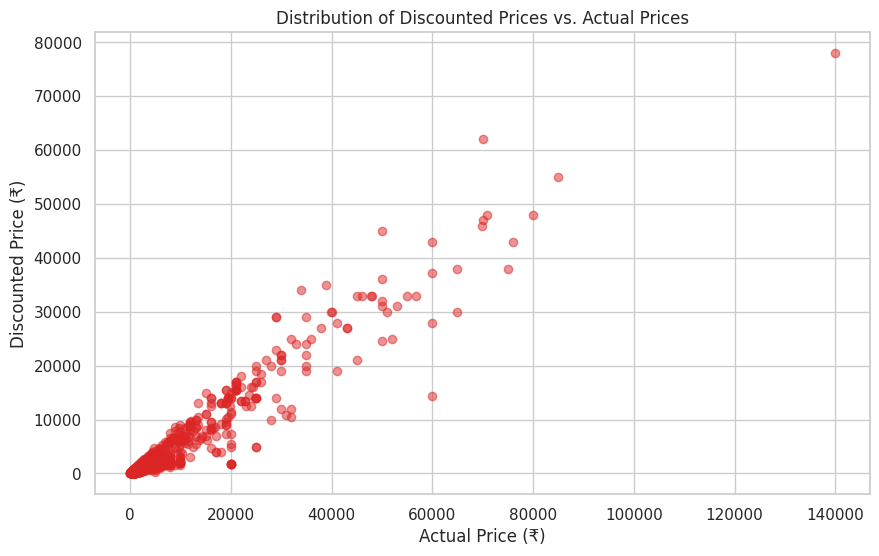

Discounted Price Stats:
count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

Actual Price Stats:
count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


In [198]:
#3.What is the distribution of discounted prices vs. actual prices?

df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], alpha=0.5, color='#dc2626')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.grid(True)
plt.show()

print("Discounted Price Stats:")
print(df['discounted_price'].describe())
print("\nActual Price Stats:")
print(df['actual_price'].describe())

In [199]:
#4.How does the average discount percentage vary across categories?
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['main_category'] = df['category'].str.split('|').str[0]
avg_discount_by_category = df.groupby('main_category')['discount_percentage'].mean().round(2)

print("Average Discount Percentage by Category:")
print(avg_discount_by_category.sort_values(ascending=False))

Average Discount Percentage by Category:
main_category
HomeImprovement          57.50
Computers&Accessories    54.02
Health&PersonalCare      53.00
Electronics              50.83
MusicalInstruments       46.00
Car&Motorbike            42.00
Home&Kitchen             40.12
OfficeProducts           12.35
Toys&Games                0.00
Name: discount_percentage, dtype: float64


In [200]:
#5.What are the most popular product names?
popular_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)

print("Most Popular Product Names (by Rating Count):")
print(popular_products)

Most Popular Product Names (by Rating Count):
                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0


In [201]:
#6.What are the most popular product keywords?
from collections import Counter
import re
def extract_keywords(text):
    words = re.split(r'\W+', text.lower())
    stop_words = {'for', 'and', 'with', 'the', 'to', 'in', 'of'}
    return [word for word in words if word and len(word) > 3 and word not in stop_words]
all_keywords = []
for name in df['product_name']:
    all_keywords.extend(extract_keywords(name))

keyword_counts = Counter(all_keywords)
most_common_keywords = keyword_counts.most_common(5)

print("Most Popular Product Keywords:")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")

Most Popular Product Keywords:
black: 530
cable: 414
charging: 247
type: 243
fast: 212


In [202]:
#7. What are the most popular product reviews?
popular_reviews = df[['product_name', 'review_title', 'review_content', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)

print("Most Popular Product Reviews (by Rating Count):")
popular_reviews

Most Popular Product Reviews (by Rating Count):


,product_name,review_title,review_content,rating_count
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",992.0
750,Eveready Red 1012 AAA Batteries - Pack of 10,"Nice .,very good batteries received,Longtevity...","Nive,very good batteries received,Like,Good pr...",989.0
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,"Kettle is good but bottle is not good quality,...","Bottle quality is not good.,Best for hot water...",976.0
823,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...,974.0
32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...,974.0


In [203]:
#8. What is the correlation between discounted_price and rating?
correlation = df['discounted_price'].corr(df['rating']).round(2)

print("Correlation between Discounted Price and Rating:")
print(correlation)

Correlation between Discounted Price and Rating:
0.12


In [204]:
#9. What are the Top 5 categories based on the highest ratings?
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['main_category'] = df['category'].str.split('|').str[0]
top_categories = df.groupby('main_category')['rating'].mean().round(2).sort_values(ascending=False).head(5)

print("Top 5 Categories by Average Rating:")

top_categories

Top 5 Categories by Average Rating:


,rating
main_category,
OfficeProducts,4.31
Toys&Games,4.30
HomeImprovement,4.25
Computers&Accessories,4.15
Electronics,4.08


In [205]:
#10. Identify any potential areas for improvement or optimization based on the data analysis

df['main_category'] = df['category'].str.split('|').str[0]

low_rated_categories = df.groupby('main_category')['rating'].mean().round(2).sort_values().head(5)

correlation = df['discounted_price'].corr(df['rating']).round(2)

complaint_keywords = ['bad', 'poor', 'not working', 'damaged', 'defective', 'slow', 'issue', 'problem']
def count_complaints(text):
    if pd.isna(text):
        return 0
    text = text.lower()
    return sum(1 for word in complaint_keywords if word in text)

df['complaint_count'] = df['review_content'].apply(count_complaints)
high_complaint_products = df[df['complaint_count'] > 0][['product_name', 'review_content', 'rating', 'complaint_count']].sort_values(by='complaint_count', ascending=False).head(5)

print("Potential Areas for Improvement or Optimization:")
print("\n1. Low-Rated Categories (Improve Quality):")
print(low_rated_categories)
print("\n2. Discount vs. Rating Correlation:")
print(f"Correlation: {correlation}")
print("Observation: If correlation is low, discounts may not improve ratings. Focus on quality, features, or customer service.")
print("\n3. Products with Common Complaints (Address Issues):")
print(high_complaint_products)
print("\n4. Additional Observations:")
print("- High discounts in some categories (e.g., check average discount) may not justify low ratings—review pricing strategy.")
print("- Check reviews for durability (e.g., cables fraying) and packaging issues (e.g., damaged items).")
print("- Ensure product descriptions match features (e.g., plug size, compatibility) to avoid negative feedback.")

Potential Areas for Improvement or Optimization:

1. Low-Rated Categories (Improve Quality):
main_category
Car&Motorbike          3.80
MusicalInstruments     3.90
Health&PersonalCare    4.00
Home&Kitchen           4.04
Electronics            4.08
Name: rating, dtype: float64

2. Discount vs. Rating Correlation:
Correlation: 0.12
Observation: If correlation is low, discounts may not improve ratings. Focus on quality, features, or customer service.

3. Products with Common Complaints (Address Issues):
                                          product_name  \
41   Mi 108 cm (43 inches) Full HD Android LED TV 4...   
536  boAt Rockerz 400 Bluetooth On Ear Headphones W...   
91   OnePlus 108 cm (43 inches) Y Series Full HD Sm...   
249  Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...   
956  TP-Link AC1200 Archer A6 Smart WiFi, 5GHz Giga...   

                                        review_content  rating  \
41   NOTE:@ If you select brand-authorized TV insta...     4.3   
536  ---------

#EDA4

In [206]:
df=pd.read_csv('spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [207]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

print(df.isnull().sum())

df = df.dropna()

print("\nDuplicate rows before cleaning:", df.duplicated().sum())
df = df.drop_duplicates()

print("\nDataFrame after cleaning:")
df.head()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows before cleaning: 27

DataFrame after cleaning:


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


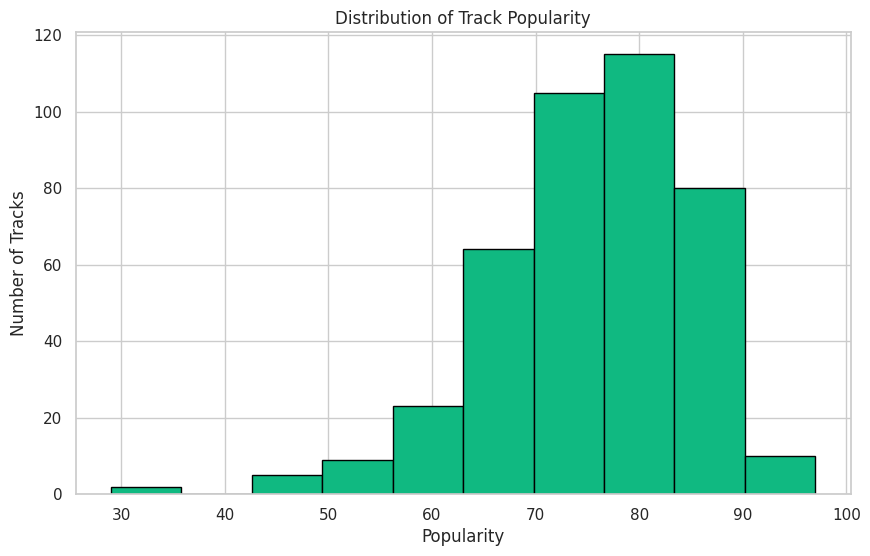

In [208]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

df = df.drop_duplicates()

plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=10, color='#10b981', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()

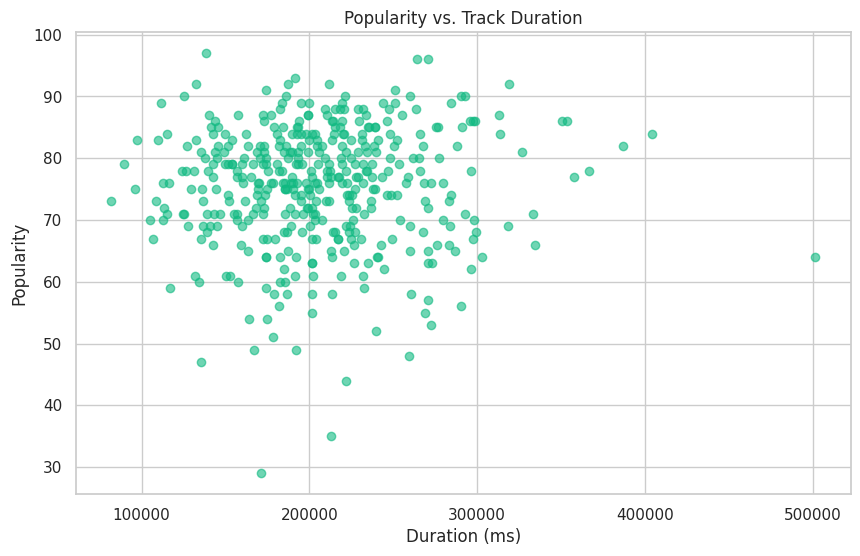

In [209]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (ms)'], df['Popularity'], color='#10b981', alpha=0.6)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Popularity vs. Track Duration')
plt.show()

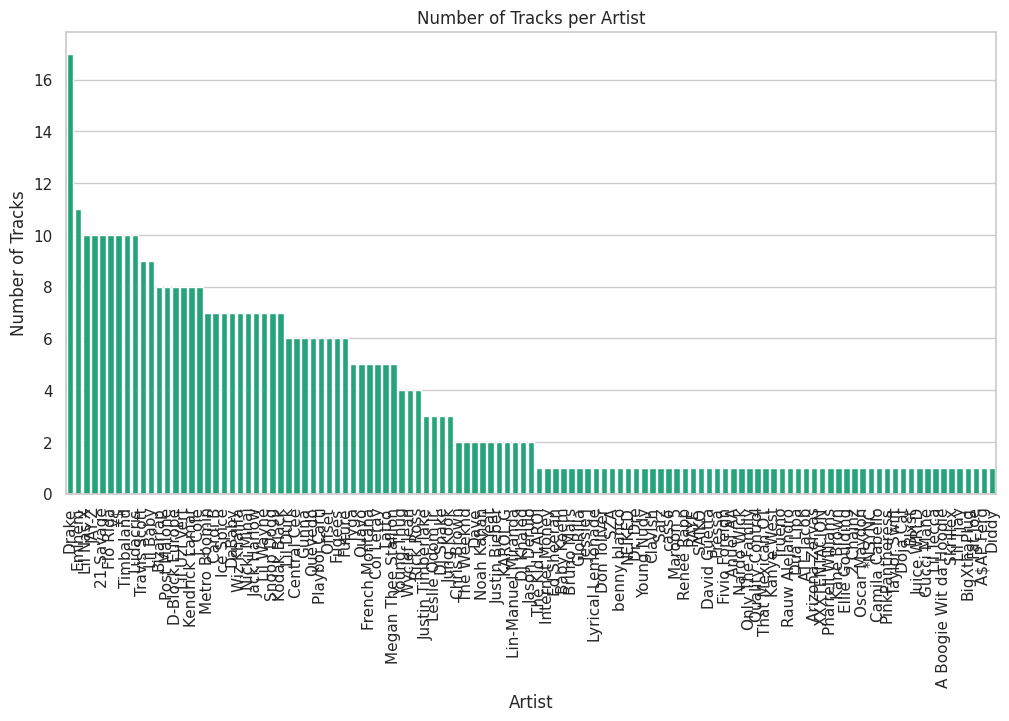

Artist with the highest number of tracks:


,count
Artist,
Drake,17


In [210]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Artist', order=df['Artist'].value_counts().index, color='#10b981')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Artist')
plt.xticks(rotation=90)
plt.show()

artist_counts = df['Artist'].value_counts()
print("Artist with the highest number of tracks:")
artist_counts.head(1)

In [211]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 least popular tracks:")
least_popular

Top 5 least popular tracks:


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [212]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate anddisplay the average popularity for each artist
artist_counts = df['Artist'].value_counts()
top_5_artists = artist_counts.head(5).index
avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("Average popularity for top 5 artists by track count:")
print(avg_popularity)
print("\nArtist with highest average popularity:")
avg_popularity.head(1)

Average popularity for top 5 artists by track count:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

Artist with highest average popularity:


,Popularity
Artist,
21 Savage,83.8


In [213]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
artist_counts = df['Artist'].value_counts()
top_5_artists = artist_counts.head(5).index
most_popular = df[df['Artist'].isin(top_5_artists)].sort_values('Popularity', ascending=False)
most_popular_tracks = most_popular.groupby('Artist').first()[['Track Name', 'Popularity']]

print("Most popular tracks for top 5 artists:")
most_popular_tracks

Most popular tracks for top 5 artists:


,Track Name,Popularity
Artist,,
21 Savage,redrum,96
Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
Eminem,Without Me,90
JAY-Z,Ni**as In Paris,86
Lil Nas X,THATS WHAT I WANT,81


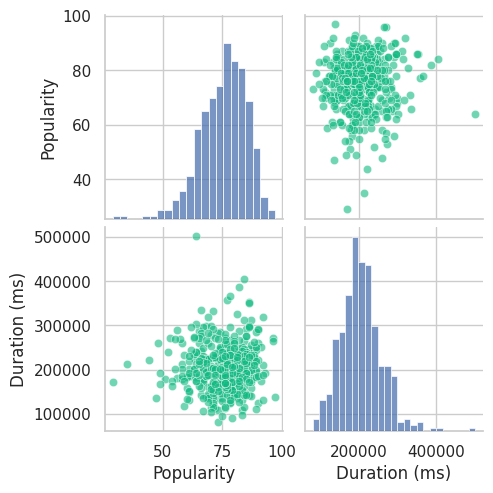

In [214]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df[['Popularity', 'Duration (ms)']], diag_kind='hist', plot_kws={'color': '#10b981', 'alpha': 0.6})
plt.show()

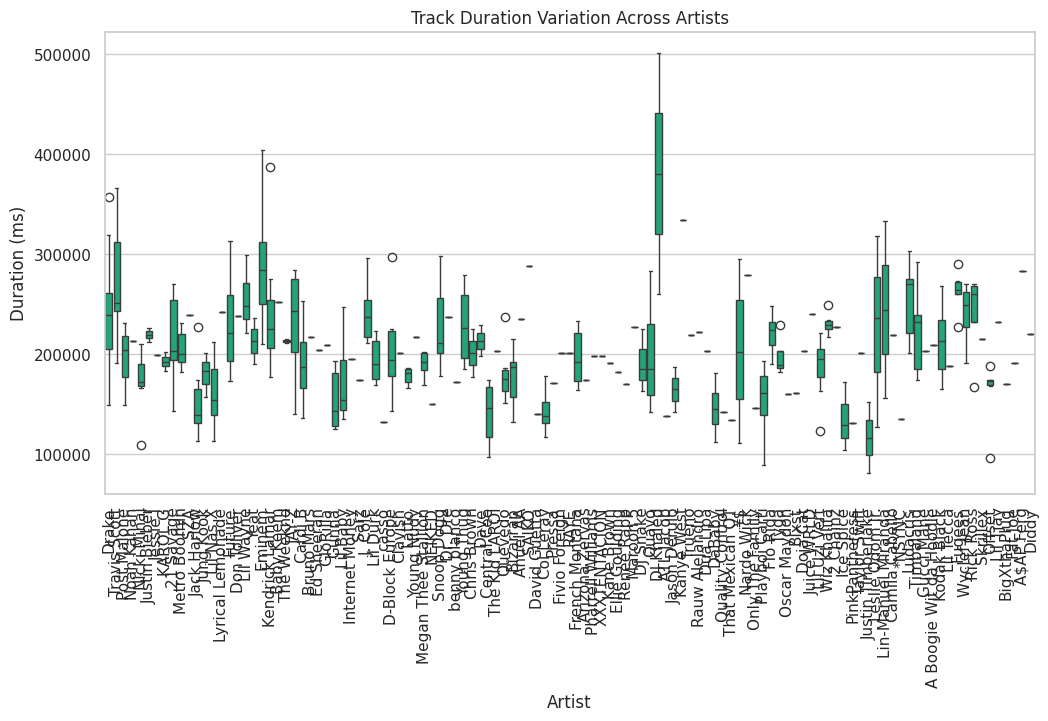

In [215]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Artist', y='Duration (ms)', color='#10b981')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Variation Across Artists')
plt.xticks(rotation=90)
plt.show()

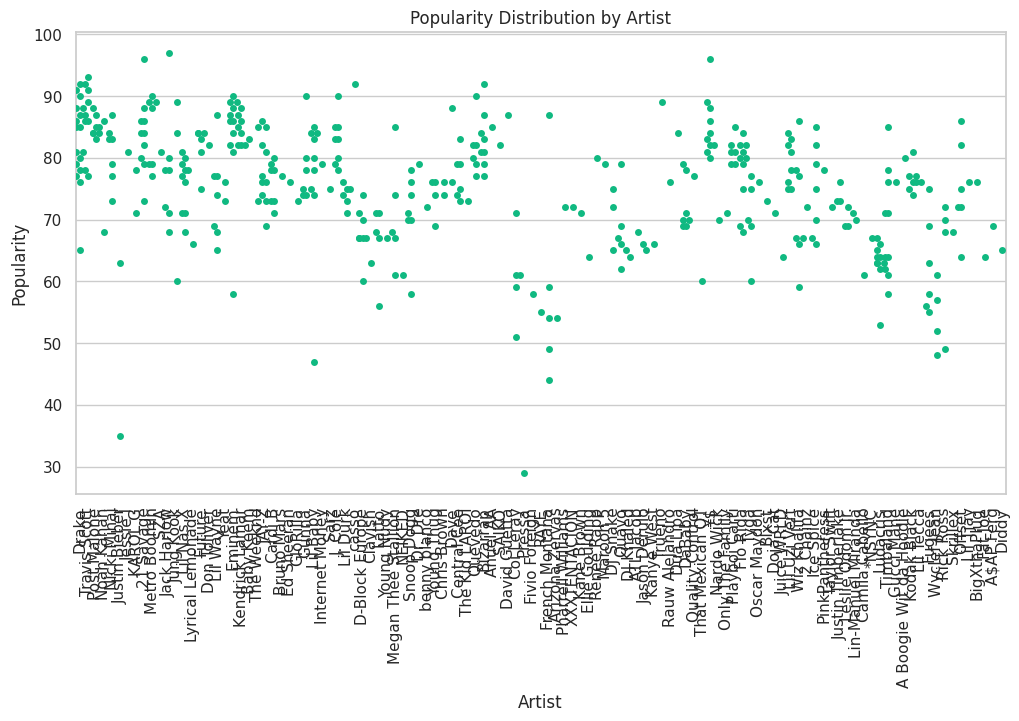

In [216]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Artist', y='Popularity', color='#10b981')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Popularity Distribution by Artist')
plt.xticks(rotation=90)
plt.show()